<a href="https://colab.research.google.com/github/thanawat150/GeoAI/blob/main/Material/Day%201/RandomForestUCMERCED-1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import gdown
# นำเข้าไลบรารี gdown สำหรับดาวน์โหลดไฟล์จาก Google Drive
# https://drive.google.com/file/d/1--p8V4jptjYFFFTq3AjF96VzqZF9v_9Q/view?usp=drive_link
# ที่อยู่ของไฟล์ Google Drive ที่ต้องการดาวน์โหลด
file_id = "1--p8V4jptjYFFFTq3AjF96VzqZF9v_9Q"
# replace with actual file ID
# กำหนด ID ของไฟล์ที่ต้องการดาวน์โหลด
output = "UCMerced_LandUse.zip"
# กำหนดชื่อไฟล์สำหรับบันทึกผลลัพธ์ที่ดาวน์โหลดมา

!gdown --id {file_id} -O {output}
# สั่งดาวน์โหลดไฟล์จาก Google Drive โดยใช้ ID ที่กำหนด และบันทึกเป็นชื่อไฟล์ที่ระบุ

# Unzip
# แตกไฟล์ซิป
!unzip -q {output} -d ./UCMerced_LandUse
# สั่งแตกไฟล์ UCMerced_LandUse.zip ไปยังโฟลเดอร์ชื่อ UCMerced_LandUse

/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1--p8V4jptjYFFFTq3AjF96VzqZF9v_9Q
From (redirected): https://drive.google.com/uc?id=1--p8V4jptjYFFFTq3AjF96VzqZF9v_9Q&confirm=t&uuid=c61bee65-3c66-4ca1-9bc1-4dfbdf85137e
To: /content/UCMerced_LandUse.zip
100% 332M/332M [00:05<00:00, 58.0MB/s]
replace ./UCMerced_LandUse/UCMerced_LandUse/Images/agricultural/agricultural00.tif? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [59]:
#random
import os
# นำเข้าไลบรารี os เพื่อทำงานกับระบบปฏิบัติการและไฟล์ต่างๆ
import numpy as np
# นำเข้าไลบรารี numpy สำหรับการคำนวณเชิงตัวเลขและการจัดการแถวลำดับ (array)
import matplotlib.pyplot as plt
# นำเข้า pyplot จาก matplotlib สำหรับการสร้างและแสดงแผนภาพ
from skimage.io import imread
# นำเข้าฟังก์ชัน imread จาก skimage เพื่ออ่านไฟล์รูปภาพ
from skimage.transform import resize
# นำเข้าฟังก์ชัน resize จาก skimage เพื่อปรับขนาดรูปภาพ
from sklearn.ensemble import RandomForestClassifier
# นำเข้า RandomForestClassifier จาก scikit-learn เพื่อใช้โมเดล Random Forest
from sklearn.svm import SVC  # Import the SVM classifier
# นำเข้า SVC (Support Vector Classifier) จาก scikit-learn
from sklearn.model_selection import train_test_split
# นำเข้าฟังก์ชัน train_test_split เพื่อแบ่งข้อมูลสำหรับฝึกฝนและทดสอบโมเดล

In [66]:
# --- 1. Load UC Merced Land Use dataset ---
# --- 1. โหลดชุดข้อมูลการใช้ที่ดิน UC Merced ---
data_dir = "UCMerced_LandUse/UCMerced_LandUse/Images"
# กำหนดที่อยู่ของโฟลเดอร์ข้อมูล
classes = sorted(os.listdir(data_dir))
# จัดเรียงชื่อโฟลเดอร์ย่อย (ประเภทการใช้งานที่ดิน)

X, y = [], []
# สร้างลิสต์เปล่า X และ y สำหรับเก็บข้อมูลคุณลักษณะ (features) และป้ายกำกับ (labels)

# loop through each class folder
# วนลูปผ่านแต่ละโฟลเดอร์ของประเภท
for idx, c in enumerate(classes):
    folder = os.path.join(data_dir, c)
    counter = 0
    for file in os.listdir(folder):
        img = imread(os.path.join(folder, file))
        img = resize(img, (128, 128), anti_aliasing=True)  # resize for speed
        # อ่านภาพและปรับขนาดให้เป็น 128x128 พิกเซลเพื่อเพิ่มความเร็วในการประมวลผล

        # --- 2. Randomly sample pixels ---
        # --- 2. สุ่มตัวอย่างพิกเซล ---
        n_samples = 30  # pixels per image
        # กำหนดจำนวนพิกเซลที่ต้องการสุ่มจากแต่ละภาพ
        h, w, _ = img.shape
        xs = np.random.randint(0, h, n_samples)
        ys = np.random.randint(0, w, n_samples)
        # สุ่มตำแหน่งพิกเซล (x, y) จากภาพ

        counter+=1
        if counter>20:
            continue
        # นับจำนวนภาพที่ประมวลผล และหยุดเมื่อถึงภาพที่ 21 เพื่อลดเวลาการทำงาน

        for i in range(n_samples):
            r, g, b = img[xs[i], ys[i]]
            X.append([r, g, b])  # features = RGB
            y.append(idx)        # label = image class
            # เก็บค่าสี RGB ของพิกเซลที่สุ่มได้ และป้ายกำกับ (หมายเลขประเภท) ของภาพนั้นๆ

X = np.array(X)
y = np.array(y)
# แปลงลิสต์ X และ y ให้เป็นรูปแบบอาเรย์ของ NumPy

print("Feature matrix shape:", X.shape)
# แสดงขนาดของเมทริกซ์คุณลักษณะ (จำนวนพิกเซลทั้งหมด, จำนวนคุณลักษณะ RGB)
print("Number of classes:", len(classes))
# แสดงจำนวนประเภทการใช้ที่ดินทั้งหมด

Feature matrix shape: (12600, 3)
Number of classes: 21


In [77]:

# --- 3. Train/test split ---
# --- 3. แบ่งข้อมูลสำหรับฝึกฝนและทดสอบ ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=42, stratify=y
)
# แบ่งข้อมูลคุณลักษณะ (X) และป้ายกำกับ (y) ออกเป็น 2 ชุด คือ ชุดฝึกฝน (train) และชุดทดสอบ (test)
# โดยกำหนดให้ชุดทดสอบมีขนาด 50% ของข้อมูลทั้งหมด
# และใช้ stratify=y เพื่อให้การแบ่งข้อมูลคงสัดส่วนของแต่ละประเภท (class) ไว้เท่าเดิม

# --- 4. Train Random Forest ---
# --- 4. ฝึกฝนโมเดล Random Forest ---
clf = RandomForestClassifier(n_estimators=1000, random_state=42, n_jobs=-1)
# สร้างโมเดล Random Forest โดยกำหนดจำนวนต้นไม้ (n_estimators) เป็น 1000 ต้น
# และใช้ n_jobs=-1 เพื่อให้ใช้หน่วยประมวลผลทั้งหมดในการทำงาน
clf.fit(X_train, y_train)
# ฝึกฝนโมเดลด้วยข้อมูลชุดฝึกฝน (X_train และ y_train)

print("Training done.")
# แสดงข้อความเมื่อการฝึกฝนเสร็จสิ้น
print("Feature importances (R,G,B):", clf.feature_importances_)
# แสดงความสำคัญของแต่ละคุณลักษณะ (ค่าสี R, G, B) ที่มีต่อการจำแนกประเภท


Training done.
Feature importances (R,G,B): [0.33691614 0.32921801 0.33386585]


In [86]:
# --- 3. Train/test split ---
# --- 3. แบ่งข้อมูลสำหรับฝึกฝนและทดสอบ ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=42, stratify=y
)
# แบ่งข้อมูลคุณลักษณะ (X) และป้ายกำกับ (y) ออกเป็น 2 ชุด คือ ชุดฝึกฝน (train) และชุดทดสอบ (test)
# โดยกำหนดให้ชุดทดสอบมีขนาด 50% ของข้อมูลทั้งหมด
# และใช้ stratify=y เพื่อให้การแบ่งข้อมูลคงสัดส่วนของแต่ละประเภท (class) ไว้เท่าเดิม

# --- 4. Train SVM ---
# --- 4. ฝึกฝนโมเดล SVM ---
# เปลี่ยนจาก RandomForestClassifier เป็น SVC
# โดยทั่วไปแล้ว ค่าเริ่มต้นของ SVC ก็ทำงานได้ดี
clf = SVC(random_state=42)
# สร้างโมเดล SVM โดยกำหนด random_state เพื่อให้ผลลัพธ์คงที่
clf.fit(X_train, y_train)
# ฝึกฝนโมเดลด้วยข้อมูลชุดฝึกฝน (X_train และ y_train)

print("Training done.")
# แสดงข้อความเมื่อการฝึกฝนเสร็จสิ้น
# SVM ไม่มี feature_importances_ เหมือน Random Forest
# ดังนั้นบรรทัดนี้จะใช้ไม่ได้
# print("Feature importances (R,G,B):", clf.feature_importances_)

Training done.


In [87]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# นำเข้าฟังก์ชัน classification_report, confusion_matrix และ accuracy_score จาก scikit-learn
# เพื่อประเมินผลลัพธ์ของโมเดล

# Evaluate on test pixels
# ประเมินผลจากพิกเซลชุดทดสอบ
y_pred = clf.predict(X_test)
# ใช้โมเดลที่ฝึกฝนแล้ว (clf) เพื่อทำนายป้ายกำกับ (y_pred) ของข้อมูลชุดทดสอบ (X_test)

print("Pixel-wise Accuracy:", accuracy_score(y_test, y_pred))
# แสดงความแม่นยำในการทำนายของแต่ละพิกเซล โดยเปรียบเทียบค่าที่ทำนายได้ (y_pred)
# กับค่าจริง (y_test)
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=classes))
# แสดงรายงานการจำแนกประเภท (Classification Report) ซึ่งประกอบด้วย
# ค่า Precision, Recall, F1-Score และ Support ของแต่ละประเภท
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
# แสดง Confusion Matrix ซึ่งเป็นตารางสรุปผลการทำนาย
# ที่แสดงว่าโมเดลทำนายได้ถูกต้องและผิดพลาดอย่างไรในแต่ละประเภท

Pixel-wise Accuracy: 0.19825396825396827

Classification Report:
                    precision    recall  f1-score   support

     agricultural       0.15      0.30      0.20       300
         airplane       0.12      0.08      0.10       300
  baseballdiamond       0.36      0.25      0.29       300
            beach       0.15      0.59      0.24       300
        buildings       0.12      0.00      0.01       300
        chaparral       0.37      0.83      0.51       300
 denseresidential       0.10      0.02      0.04       300
           forest       0.27      0.62      0.37       300
          freeway       0.14      0.02      0.03       300
       golfcourse       0.23      0.49      0.31       300
           harbor       0.23      0.44      0.30       300
     intersection       0.10      0.03      0.05       300
mediumresidential       0.00      0.00      0.00       300
   mobilehomepark       0.20      0.03      0.05       300
         overpass       0.00      0.00      0.00

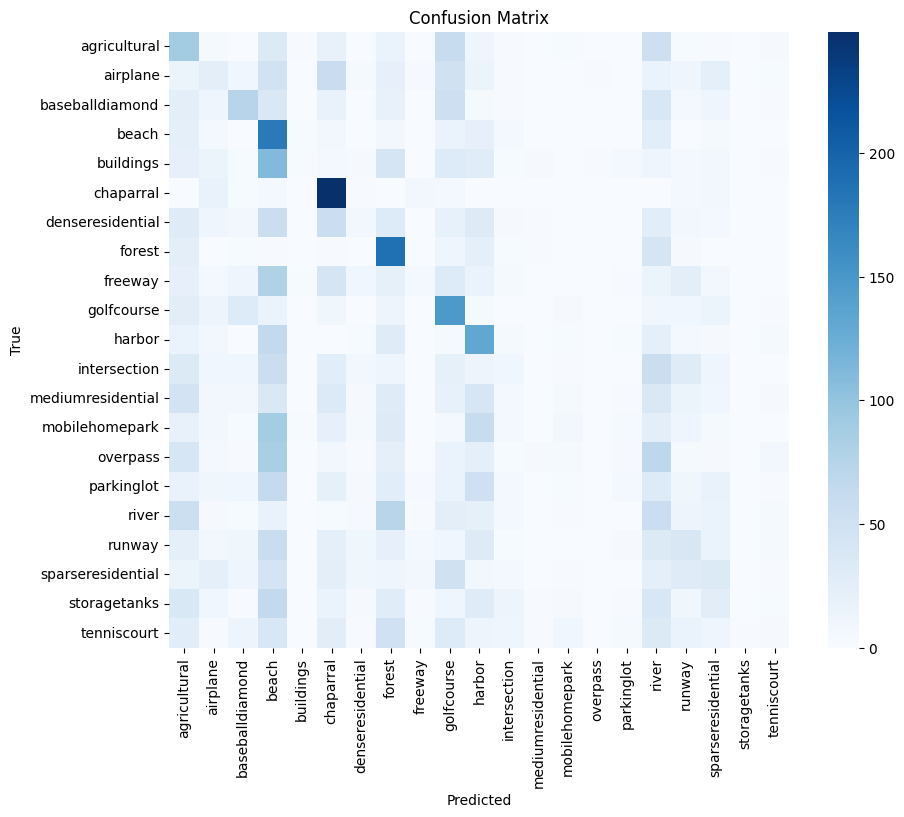

In [88]:
import seaborn as sns
# นำเข้าไลบรารี seaborn สำหรับการสร้างกราฟที่สวยงาม

cm = confusion_matrix(y_test, y_pred)
# สร้าง Confusion Matrix (cm) จากค่าจริง (y_test) และค่าที่ทำนาย (y_pred)
plt.figure(figsize=(10,8))
# กำหนดขนาดของกราฟให้มีขนาด 10x8 นิ้ว
sns.heatmap(cm, annot=False, cmap="Blues", xticklabels=classes, yticklabels=classes)
# สร้าง Heatmap จาก Confusion Matrix โดยใช้ฟังก์ชัน heatmap ของ seaborn
# annot=False: ไม่แสดงตัวเลขกำกับในแต่ละช่อง
# cmap="Blues": ใช้โทนสีฟ้า
# xticklabels=classes: กำหนดป้ายกำกับแกน X ด้วยชื่อประเภท (classes)
# yticklabels=classes: กำหนดป้ายกำกับแกน Y ด้วยชื่อประเภท (classes)
plt.title("Confusion Matrix")
# กำหนดชื่อเรื่องของกราฟเป็น "Confusion Matrix"
plt.xlabel("Predicted")
# กำหนดชื่อแกน X เป็น "Predicted" (ค่าที่ทำนาย)
plt.ylabel("True")
# กำหนดชื่อแกน Y เป็น "True" (ค่าจริง)
plt.show()
# แสดงกราฟ


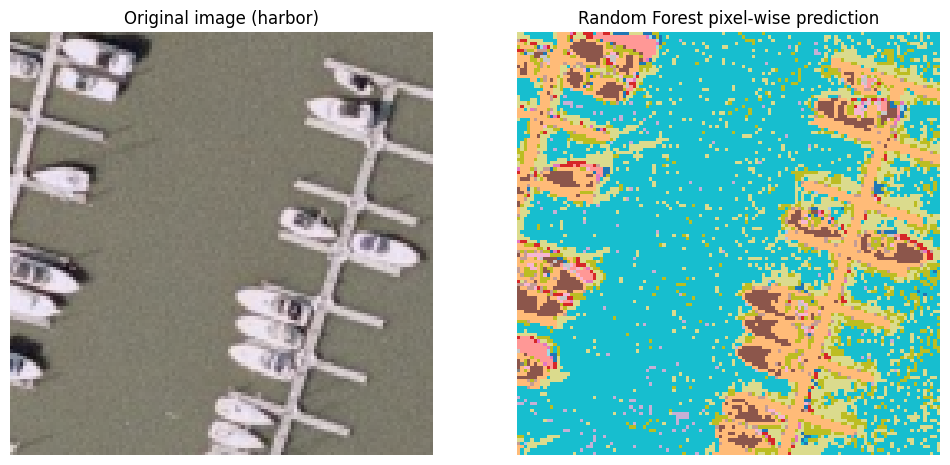

In [102]:

# --- 5. Pixel-wise inference on a test image ---
# --- 5. การทำนายผลทีละพิกเซลบนภาพทดสอบ ---
test_class = np.random.choice(classes)
# สุ่มเลือกประเภท (class) สำหรับภาพทดสอบ
test_folder = os.path.join(data_dir, test_class)
# กำหนดโฟลเดอร์ของภาพทดสอบ
test_file = np.random.choice(os.listdir(test_folder))
# สุ่มเลือกไฟล์ภาพสำหรับทดสอบ
test_img = imread(os.path.join(test_folder, test_file))
# อ่านภาพทดสอบ
test_img = resize(test_img, (128,128), anti_aliasing=True)
# ปรับขนาดภาพทดสอบให้เป็น 128x128 พิกเซล

h, w, _ = test_img.shape
pixels = test_img.reshape(-1, 3)
# เปลี่ยนรูปแบบภาพ (h x w x 3) ให้เป็นอาเรย์ของพิกเซล (n_pixels x 3)
preds = clf.predict(pixels)
# ใช้โมเดล (clf) เพื่อทำนายประเภทของแต่ละพิกเซล
pred_map = preds.reshape(h, w)
# เปลี่ยนอาเรย์ผลลัพธ์การทำนายให้กลับไปเป็นขนาดภาพ (h x w)

# --- 6. Plot results ---
# --- 6. แสดงผลลัพธ์ ---
fig, axs = plt.subplots(1, 2, figsize=(12,6))
# สร้างกราฟ 2 รูปในแถวเดียวกัน โดยมีขนาดรวม 12x6 นิ้ว
axs[0].imshow(test_img)
# แสดงภาพต้นฉบับในกราฟแรก
axs[0].set_title(f"Original image ({test_class})")
# ตั้งชื่อกราฟแรกเป็น "Original image" พร้อมชื่อประเภท
axs[0].axis("off")
# ปิดแกนของกราฟแรก

axs[1].imshow(pred_map, cmap="tab20")  # 21-class color map
# แสดงภาพผลลัพธ์การทำนายในกราฟที่สอง โดยใช้ชุดสีสำหรับ 21 ประเภท
axs[1].set_title("Random Forest pixel-wise prediction")
# ตั้งชื่อกราฟที่สองเป็น "Random Forest pixel-wise prediction"
axs[1].axis("off")
# ปิดแกนของกราฟที่สอง

plt.show()
# แสดงกราฟทั้งหมด